# Seattle Airbnb Data

The data I used in this notebook refer to over 3800 accommodations that where enlisted to Airbnb in Seattle during 2016. They describe a wide variety of features: not only information about hosts, locations and fares applied to each listing, but also their average ratings and availability period. These datasets are available for free download at https://www.kaggle.com/datasets/airbnb/seattle, where you can find more details and other interesting studies about them.

#### CRISP-DM process

1. **Business Understanding**

    These were the questions I decided to explore in the dataset:
    - Do ratings depend on the location of the listings?
    - Which neighborhood has the highest average ratings?
    - Are average ratings biased by prices?
    - Are average ratings biased by availability density?
    
    </br>
    The whole notebook is aimed to answer the first question, while there are three specific paragraphs dedicated to discuss each of the three other questions.
</br>

2. **Data Understanding**

    Here I used the Seattle Airbnb ***listings.csv*** dataset to attempt to answer our questions of interest. 
    
    In the paragraph **Data Exploration** I extracted some general information about the dataset structure and I computed some straight-forward statistics about its content such as:
    - the percetage of missing values in each field
    - the average rating for the listings in all city
    
    </br>
    
    From the large amount of fields available in the dataset a small subset of columns has been used containing information about:
    - ratings
    - geographical location
    - prices
    
</br>

3. **Prepare Data**
    
    The data preparation process is performed as follows:
    - in the paragraph **Pre-Processing** records corresponding to missing ratings are removed from the dataset
    - in the paragraph **Which neighborhood has the highest average ratings?** new data frames are defined to store statistics depending from geographical location
    - in the paragraph **Are average ratings biased by availability density?** some steps of data quality on the ***price*** field are performed 

</br>

4. **Model Data**

    In order to answer the questions which are dealt with in this notebook, it wasn't necessary to implement advanced model. In each paragraph, results are obtained by computing visuals that underline the relation between the considered fields.

</br>

5. **Results and Deploy**
   
   Results of the analysis performed in this notebook are duscussed in the post available [here](https://medium.com/@karlin.giordana/how-can-you-improve-your-ratings-as-airbnb-host-17c25338103f).

## Do ratings depend on the location of the listings?

First I was intended to understand if ratings heavily depend on where an accommodation is located. 

Indeed, one can expect that the overall experience of a stay is strongly influenced by one of the following aspects: 
- how far the location is from the airport
- how easy is to reach the main attractions or the business district of the city
- how much is the neighborhood safe when coming back at night

But is this true according to data? 

#### Imports

Read the necessary libraries and import data from ***listings.csv*** file

##### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

##### Import Datasets

In [2]:
df_listings = pd.read_csv('./listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

#### Definition of functions

Here I define some functions that I use in the following paragraphs in order to use the DRY principle

In [3]:
def data_exploration(df):
    '''Takes in a Data Frame df.
Prints its shape.
Returns a Data Frame whose index is the list of the input DF fields with a column with % of missing values'''
    
    print("The Data Frame has " + str(df.shape[0]) + " rows")
    print("The Data Frame has " + str(df.shape[1]) + " columns")

    df_output = pd.DataFrame(df.isnull().mean(), columns=['% of null values'])

    return df_output

In [4]:
print(data_exploration.__doc__)

Takes in a Data Frame df.
Prints its shape.
Returns a Data Frame whose index is the list of the input DF fields with a column with % of missing values


In [5]:
def remove_missing_bycol(df, column_names):
    '''Takes in a Data Frame (df) and a list of strings (column_names).
Returns a Data Frame without records with missing values in the inputed columns'''
    
    df_output = df.dropna(subset = column_names)
    
    return df_output

In [6]:
print(remove_missing_bycol.__doc__)

Takes in a Data Frame (df) and a list of strings (column_names).
Returns a Data Frame without records with missing values in the inputed columns


In [7]:
def group_by_col(df, col_by, col_togroup, grouping_criterium):
    '''Takes in a Data Frame (df), 3 list of strings (col_by, col_togroup and grouping_criterium).
Returns a Data Frame whose index are the values on which the data is grouped by with:
- a column for each grouped column with the specified aggregation criterium for the category
- a column for each grouped column with the gap between the mean for the category and the average value on all dataset
- a column for each grouped column with the number of records for the category'''
    
    
    df_output = pd.DataFrame(df.groupby(col_by).aggregate(dict(zip(col_togroup, grouping_criterium))))
    avg = df[col_togroup].mean()
    df_output['gap'] = df_output - avg
    df_output['listings_number'] = df.groupby(col_by)[col_togroup].count()
    
    return df_output

In [8]:
print(group_by_col.__doc__)

Takes in a Data Frame (df), 3 list of strings (col_by, col_togroup and grouping_criterium).
Returns a Data Frame whose index are the values on which the data is grouped by with:
- a column for each grouped column with the specified aggregation criterium for the category
- a column for each grouped column with the gap between the mean for the category and the average value on all dataset
- a column for each grouped column with the number of records for the category


In [9]:
def barplot_with_color(df, y_col, color_col):
    '''Takes in a Data Frame (df), 2 strings (y_col and color_col).
Plots a horizontal bar plot with values of y_col as y, color gradient red to green depending on color_col'''
    
    df = df.sort_values(by = y_col, ascending = False)
    gradient = avg_rating_neighbourhood[color_col] / max(avg_rating_neighbourhood[color_col])
    colors = [(1-x, x, 0) for x in gradient]
    fig_h = df[y_col].nunique()/4
    df.plot.barh(y = y_col, color=colors,  legend=False, figsize = (5,fig_h)).tick_params(axis='both', labelsize=9);
    
    return 1

In [10]:
print(barplot_with_color.__doc__)

Takes in a Data Frame (df), 2 strings (y_col and color_col).
Plots a horizontal bar plot with values of y_col as y, color gradient red to green depending on color_col


In [11]:
def compare_measures_by_col(df, y_col, y_lim_min, y_lim_max, y_label, r_y_col, r_y_lim_min, r_y_lim_max, r_y_label):
    '''Takes in a Data Frame (df), 4 strings (y_col, r_y_col, y_label and r_y_label).
Plots a bar plot with
- values of y_col as y
- values of r_y_col as secondary y
- y_lim_min, y_lim_max as limits of y axis
- r_y_lim_min, r_y_lim_max as limits of secondary y axis
- y_label as label for y axis
- r_y_label as label for secondary y axis
- no label for x axis
Returns the plot object'''
    
    ax = df.sort_values(by = y_col, ascending=True).plot.bar(y = [y_col,r_y_col], secondary_y = r_y_col, legend=False)
    ax.set_ylim(y_lim_min, y_lim_max)
    ax.right_ax.set_ylim(r_y_lim_min, r_y_lim_max)
    ax.set_xlabel("")
    ax.set_ylabel(y_label)
    ax.right_ax.set_ylabel(r_y_label)
    
    return ax

In [12]:
print(compare_measures_by_col.__doc__)

Takes in a Data Frame (df), 4 strings (y_col, r_y_col, y_label and r_y_label).
Plots a bar plot with
- values of y_col as y
- values of r_y_col as secondary y
- y_lim_min, y_lim_max as limits of y axis
- r_y_lim_min, r_y_lim_max as limits of secondary y axis
- y_label as label for y axis
- r_y_label as label for secondary y axis
- no label for x axis
Returns the plot object


#### Data Exploration

In [13]:
data_exploration(df_listings)

The Data Frame has 3818 rows
The Data Frame has 92 columns


,% of null values
id,0.000000
listing_url,0.000000
scrape_id,0.000000
last_scraped,0.000000
name,0.000000
summary,0.046359
space,0.149031
description,0.000000
experiences_offered,0.000000
neighborhood_overview,0.270299


In [14]:
avg_rating = df_listings.review_scores_rating.mean()
avg_rating

94.53926206244087

The average rating for all city is 94.5 out of 100

#### Pre-Processing

##### Remove records with average rating missing

Since we are interested in studying the rating scores of the listings, we can remove from the dataset all listings that are not rated

In [15]:
df_ratedListings = remove_missing_bycol(df_listings, ['review_scores_rating'])

##### Compute the average rating

### Which neighborhood has the highest average ratings?

All the meaningful information about the location of each listing is stored in the fileds
- neighbourhood_cleansed
- neighbourhood_group_cleansed
- latitude
- longitude

##### Average Rating by Neighbourhood

Define a data frame to store statistics for each neighborhood.

Compute:
- the average rating for each neighborhood using the field ***review_scores_rating***
- the gap between the average rating for each neighborhood and the city average
- the number of listings available for each neighborhood

In [16]:
avg_rating_neighbourhood = group_by_col(df_ratedListings, ['neighbourhood_cleansed'], ['review_scores_rating'], ['mean'])
avg_rating_neighbourhood

,review_scores_rating,gap,listings_number
neighbourhood_cleansed,,,
Adams,95.350877,0.811615,57
Alki,95.892857,1.353595,28
Arbor Heights,98.000000,3.460738,3
Atlantic,95.333333,0.794071,42
Belltown,93.477833,-1.061430,203
Bitter Lake,94.916667,0.377405,12
Briarcliff,92.750000,-1.789262,12
Brighton,95.272727,0.733465,11
Broadview,96.375000,1.835738,16


The following bar plot shows the gap between the average rating for each neighborhood and the city average. 

The color of the bars represents the number of listings for available for each neighborhood:
- the red bars correspond to neighborhoods with the less listings
- the green bars correspond to neighborhoods with the more listings

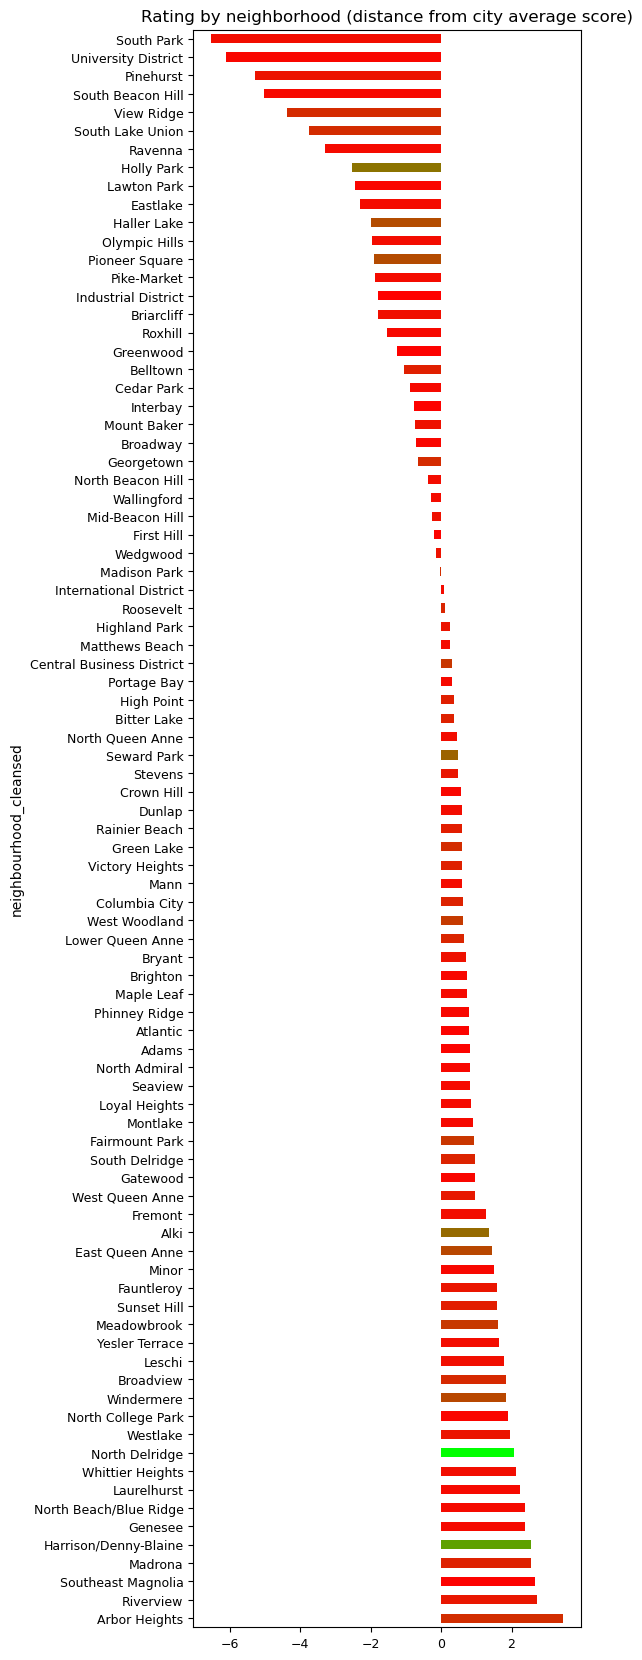

In [17]:
barplot_with_color(avg_rating_neighbourhood, 'gap', 'listings_number');
plt.title("Rating by neighborhood (distance from city average score)");

##### Average Rating by Group of Neighbourhoods

Define a data frame to store statistics for each group of neighborhoods.

Compute:
- the average rating for each group of neighborhoods using the field ***review_scores_rating***
- the gap between the average rating for each group of neighborhoods and the city average
- the number of listings available for each group of neighborhoods

In [18]:
avg_rating_neighbourhood_gr = group_by_col(df_ratedListings, ['neighbourhood_group_cleansed'], ['review_scores_rating'], ['mean'])
avg_rating_neighbourhood_gr

,review_scores_rating,gap,listings_number
neighbourhood_group_cleansed,,,
Ballard,95.533679,0.994417,193
Beacon Hill,94.019417,-0.519845,103
Capitol Hill,94.184783,-0.354479,460
Cascade,92.461538,-2.077724,65
Central Area,96.009404,1.470142,319
Delridge,95.861538,1.322276,65
Downtown,93.958333,-0.580929,456
Interbay,93.777778,-0.761484,9
Lake City,94.375000,-0.164262,56


The following bar plot shows the gap between the average rating for each group of neighborhoods and the city average.

The color of the bars represents the number of listings for available for each group of neighborhoods:
- the red bars correspond to groups of neighborhoods with the less listings
- the green bars correspond to groups of neighborhoods with the more listings

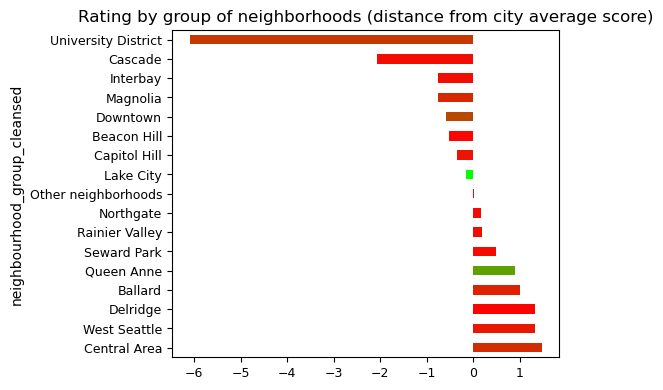

In [19]:
barplot_with_color(avg_rating_neighbourhood_gr, 'gap', 'listings_number');
plt.title("Rating by group of neighborhoods (distance from city average score)");

##### Rating by Coordinates

Define a subset data frame with latitude and longitude for each listing

In [20]:
df_coordinates = df_ratedListings[['longitude', 'latitude']]

To avoid a skewed representation, here I remove the effect of outliers by rounding to the 10th quantile the ratings that are lower

In [21]:
quantile_10th = df_ratedListings['review_scores_rating'].quantile(0.1)
quantile_10th

87.0

In [22]:
df_coordinates['rating'] = pd.DataFrame({'col1': df_ratedListings['review_scores_rating'], 'col2': [quantile_10th for i in df_coordinates.index]}).max(axis=1) - avg_rating

C:\Users\2100\AppData\Local\Temp\ipykernel_21604\3568436600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coordinates['rating'] = pd.DataFrame({'col1': df_ratedListings['review_scores_rating'], 'col2': [quantile_10th for i in df_coordinates.index]}).max(axis=1) - avg_rating


In [23]:
df_coordinates.describe()

,longitude,latitude,rating
count,3171.000000,3171.000000,3171.000000
mean,-122.332870,47.628684,0.763797
std,0.031571,0.042962,4.258810
min,-122.417219,47.505088,-7.539262
25%,-122.353981,47.608762,-1.539262
50%,-122.328980,47.623076,1.460738
75%,-122.310570,47.662419,4.460738
max,-122.254189,47.733358,5.460738


The following scatter plot shows all listings according to their geographical coordinates.

The color of the dots represents the gap between the average rating for each listing and the city average:
- the red dots correspond to listings with lower rating
- the green dots correspond to listings with higher rating

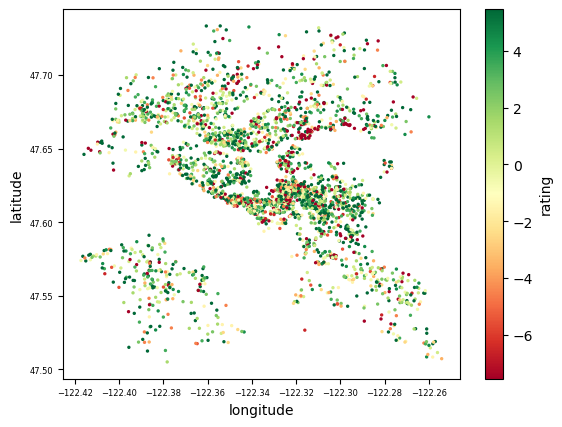

In [24]:
df_coordinates.plot.scatter(x="longitude", y="latitude", c="rating", s=2, colormap = "RdYlGn").tick_params(axis='both', labelsize=6);

### Are average ratings biased by availability density?

The following chart compares the rating scores associated to each group of neighborhoods to the average number of listings available in the same area.

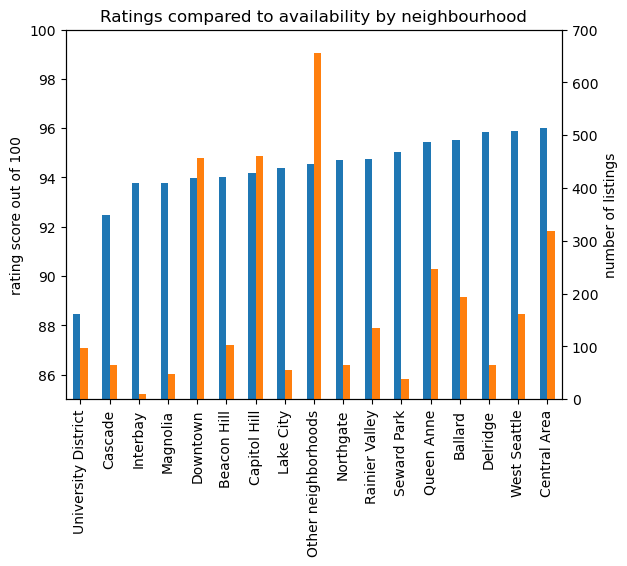

In [25]:
ax = compare_measures_by_col(avg_rating_neighbourhood_gr, 'review_scores_rating', 85, 100, "rating score out of 100", 'listings_number', 0, 700, "number of listings")
plt.title("Ratings compared to availability by neighbourhood");

### Are average ratings biased by prices?

In order to compare rating to price is first necessary to transform data in ***price*** field in numeric format

In [26]:
df_ratedListings['price_numeric'] = df_ratedListings['price'].replace(regex=[r'\$', ','], value='').astype('float64')

C:\Users\2100\AppData\Local\Temp\ipykernel_21604\9439770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratedListings['price_numeric'] = df_ratedListings['price'].replace(regex=[r'\$', ','], value='').astype('float64')


Compute the average price applied to all listings in the city

In [27]:
avg_price = df_ratedListings.price_numeric.mean()
avg_price

126.80258593503626

Add to the dataframe with statistics for each group of neighborhoods fields storing informations about prices.

Compute the average price for each group of neighborhoods.

In [28]:
avg_rating_neighbourhood_gr['price'] = df_ratedListings.groupby(['neighbourhood_group_cleansed'])['price_numeric'].mean()

In [29]:
avg_rating_neighbourhood_gr['price_gap'] = avg_rating_neighbourhood_gr['price'] - avg_price

The following chart compares the rating scores associated to each neighborhood to the average prices recorded in the same area.

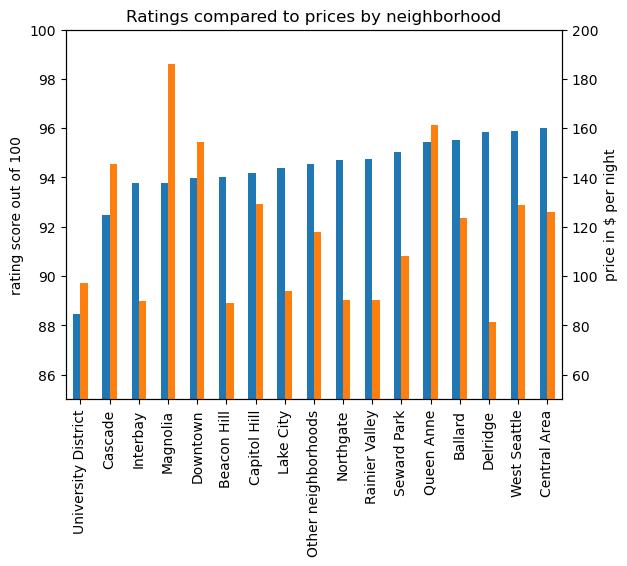

In [30]:
ax = compare_measures_by_col(avg_rating_neighbourhood_gr, 'review_scores_rating', 85, 100, "rating score out of 100", 'price', 50, 200, "price in $ per night")
plt.title("Ratings compared to prices by neighborhood");